<a href="https://colab.research.google.com/github/bmreiniger/datascience.stackexchange/blob/master/so79696701_rf_rebuild_individual_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Parameters
n_samples = 160
n_features = 20


# Create training data
Xs, y = make_regression(n_samples = n_samples, n_features = n_features, random_state = 0, shuffle = False)

# Create testing Xs
np.random.seed(0)
Xs_test = np.random.standard_normal((40, n_features))


#%%
# Random forest
n_estimators = 10
max_depth = 4
min_samples_leaf = 17
min_samples_split = 3
# min_samples_leaf = 1
# min_samples_split = 2
rf = RandomForestRegressor(random_state = 0, oob_score = False, max_features = None,
                           n_estimators = n_estimators,
                           max_depth = max_depth,
                           min_samples_leaf = min_samples_leaf,
                           min_samples_split = min_samples_split)

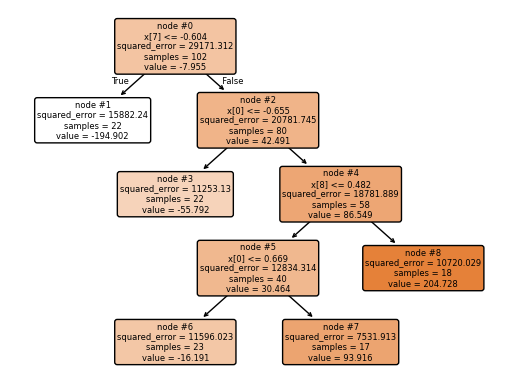

<Figure size 2000x1000 with 0 Axes>

In [30]:
rf.fit(Xs, y)
y_pred = rf[0].predict(Xs_test)

# Plotting the 1st tree structure
tree = rf.estimators_[0]
plot_tree(tree, filled = True, rounded = True, node_ids = True, fontsize = 6)

plt.figure(figsize=(20, 10))
plt.show();

In [31]:
# Replicate the 1st tree
# Get the bootstrapped samples
sample_indices = rf.estimators_samples_[0]
bootstrap_Xs = Xs[sample_indices, :]
bootstrap_y = y[sample_indices]

decision_tree = DecisionTreeRegressor(random_state = tree.random_state, max_features = None,
                           max_depth = max_depth,
                                                      min_samples_leaf = min_samples_leaf,
                                                                                 min_samples_split = min_samples_split)

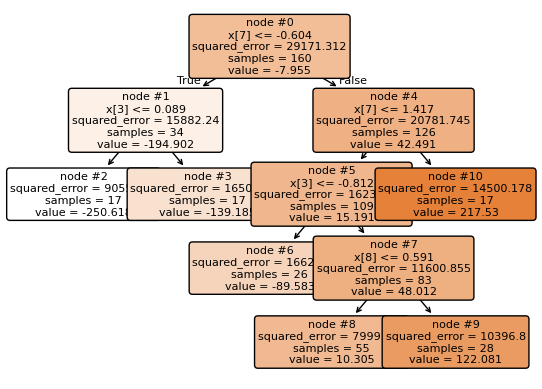

<Figure size 2000x1000 with 0 Axes>

In [32]:
decision_tree.fit(bootstrap_Xs, bootstrap_y)
y_pred_check = decision_tree.predict(Xs_test)


# Plot the replicated decision tree
plot_tree(decision_tree, filled = True, rounded = True, node_ids = True, fontsize = 8)
plt.figure(figsize=(20, 10))
plt.show()

In [33]:
np.allclose(y_pred, y_pred_check)

False

In [34]:
tree.random_state

209652396

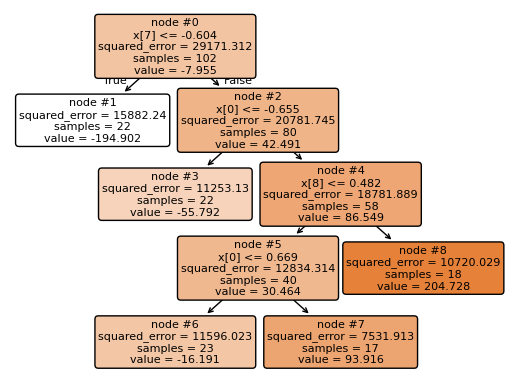

<Figure size 2000x1000 with 0 Axes>

In [38]:
# Replicate the 1st tree
# Get the bootstrapped samples
sample_indices = rf.estimators_samples_[0]
bootstrap_Xs = Xs[sample_indices, :]
bootstrap_y = y[sample_indices]

# compute weights!
weights = np.bincount(sample_indices, minlength=len(sample_indices))
# weight 0 on unselected indices; we could collapse those,
# or just fit on the un-bootstrapped sample with these weights (weight 0 effectively doesn't)

wtd_decision_tree = DecisionTreeRegressor(random_state = tree.random_state, max_features = None,
                           max_depth = max_depth,
                                                      min_samples_leaf = min_samples_leaf,
                                                                                 min_samples_split = min_samples_split)
wtd_decision_tree.fit(Xs, y, sample_weight=weights)
wtd_preds = wtd_decision_tree.predict(Xs_test)

plot_tree(wtd_decision_tree, filled = True, rounded = True, node_ids = True, fontsize = 8)
plt.figure(figsize=(20, 10))
plt.show()

In [36]:
np.allclose(wtd_preds, y_pred)

True

In [37]:
decision_tree.random_state

209652396

In [ ]:
Xs.shape

(160, 20)

In [ ]:
bootstrap_Xs.shape

(160, 20)

In [ ]:
len(sample_indices)

160